<a href="https://colab.research.google.com/github/mayank453/Deep-Learning/blob/main/TF_101_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import tensorflow as tf

In [36]:
! free -m

              total        used        free      shared  buff/cache   available
Mem:          12993        1182        9567           1        2243       11562
Swap:             0           0           0


In [37]:
! nvidia-smi

Sun Jun 13 05:54:42 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [38]:
%tensorflow_version 2.x # this command is only for google colab 

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x # this command is only for google colab`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [39]:
import tensorflow as tf
tf.__version__

'2.5.0'

In [40]:
from tensorflow import keras

In [41]:
keras.__version__

'2.5.0'

In [42]:
from tensorflow.keras import datasets

In [43]:
  train_data,test_data = datasets.mnist.load_data()

In [44]:
type(train_data[1])

numpy.ndarray

In [45]:
images= train_data[0]
labels= train_data[1]

In [46]:
images.shape

(60000, 28, 28)

In [47]:
labels.shape

(60000,)

In [48]:
import matplotlib.pyplot as plt


5


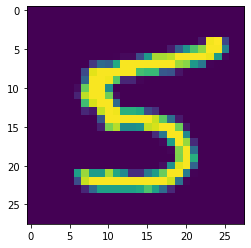

In [49]:
plt.imshow(images[40258])
print(labels[40258])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


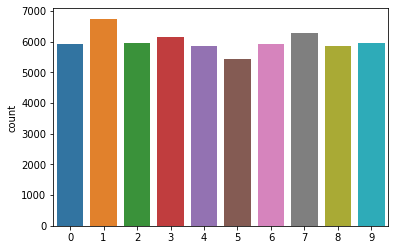

In [50]:
# for checking the bias 
import pandas as pd 
import seaborn as sns
sns.countplot(labels)

In [51]:
(X_train,y_train),(X_test,y_test)= datasets.mnist.load_data()

In [52]:
# Normalization 0 to 1
# min max scaler 

In [53]:
# Min Max Scaler
import numpy as np 
np.array([1,2,3,4,5])/5

array([0.2, 0.4, 0.6, 0.8, 1. ])

In [54]:
X_train[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [55]:
X_train.max() # Finding the Number bigger number of normailization 

255

In [56]:
# Min Max Scaler 
X_train= X_train/255.0

In [57]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

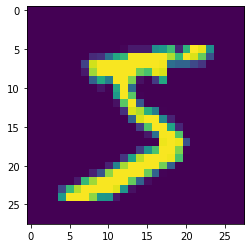

In [58]:
# Checking the pic value has chanded or not 
plt.imshow(X_train[0])

In [59]:
d_label = np.array([1,2,0,1,2,3,0,1,1,2,4])

In [60]:
from tensorflow.keras.utils import to_categorical

In [61]:
to_categorical(d_label) # one hot encoding 

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [62]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [63]:
y_train = to_categorical(y_train) # one hot encoding 
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [64]:
model= keras.models.Sequential()  # we use Sequential here because neuron are connected (input/output)
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(512,activation='relu')) # for input 
model.add(keras.layers.Dense(10,activation='softmax')) # for outplut

In [65]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.compile(optimizer=keras.optimizers.SGD( ),loss= keras.losses.categorical_crossentropy,metrics=['acc'])

In [67]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.6018 - acc: 0.8534
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3222 - acc: 0.9108
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2749 - acc: 0.9239
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2447 - acc: 0.9321
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2220 - acc: 0.9380
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2033 - acc: 0.9438
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1871 - acc: 0.9480
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1737 - acc: 0.9512
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1620 - acc: 0.9551
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1516 - acc: 0.9583


In [72]:
model.save('MNIST_digit_classification') # Saving Our Model

INFO:tensorflow:Assets written to: MNIST_digit_classification/assets


In [74]:
new_model= tf.keras.models.load_model('MNIST_digit_classification') # Laoding New Model

In [75]:
prediciton= new_model.predict([X_test]) # Check Predection

In [77]:
print(np.argmax(prediciton[0]))  

7


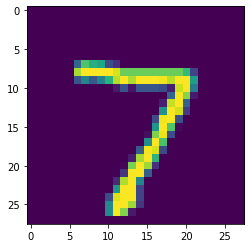

In [78]:
plt.imshow(X_test[0])